In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

In [2]:
skilllane = pd.read_csv('skilllane.csv')
skooldio = pd.read_csv('skooldio.csv')

In [3]:
clean_skilllane = skilllane[['comments','stars']]
clean_skilllane

,comments,stars
0,NaN,5
1,NaN,5
2,NaN,3
3,NaN,4
4,NaN,5
...,...,...
943,NaN,4
944,สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...,5
945,NaN,5
946,ดีสุดๆเลยครับ,5


In [4]:
clean_skilllane.isna().sum()

comments    827
stars         0
dtype: int64

In [5]:
clean_skilllane = clean_skilllane.dropna()
clean_skilllane

,comments,stars
9,ได้ความรู้ดีมากค่ะ,5
23,5,5
34,น้ำเสียงคำพูดการสื่อสารชัดเจนเข้าใจง่ายดีมากครับ,5
40,ต้องการให้มีการบรรยายมากกว่า 1 ท่าน เพื่อให้ไม...,3
44,เยี่ยมครับ,5
...,...,...
923,Good,5
924,อันนี้รีวิว หลังจากดูจบแล้วครับ\nเกรินก่อน ผมเ...,5
925,อ.บอย สอนได้ละเอียดมากครับ\nแต่ถ้าเอาไปเขียนเอ...,5
944,สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...,5


In [9]:
clean_skilllane.drop_duplicates(inplace=True)

/var/folders/by/0rz3gnw148l6ch25mwf10xjc0000gn/T/ipykernel_7936/3765637619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_skilllane.drop_duplicates(inplace=True)


<AxesSubplot: xlabel='stars', ylabel='count'>

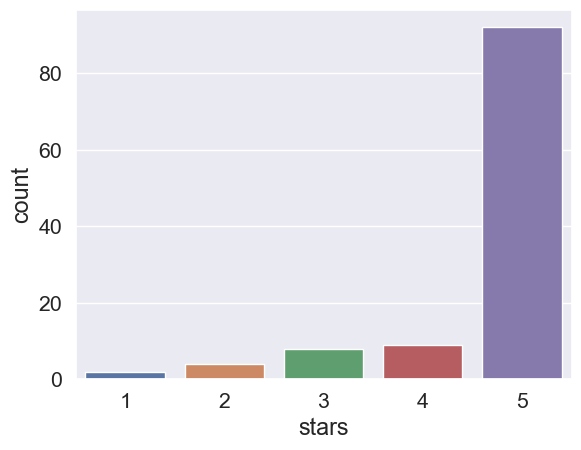

In [11]:
sns.countplot(x=clean_skilllane['stars'])

In [12]:
clean_skilllane['stars'].value_counts()

5    92
4     9
3     8
2     4
1     2
Name: stars, dtype: int64

In [13]:
def stars_to_types(star):
    if star >= 4:
        return 'pos'
    else:
        return 'neg'

In [14]:
clean_skilllane['target'] = clean_skilllane['stars'].apply(stars_to_types)

/var/folders/by/0rz3gnw148l6ch25mwf10xjc0000gn/T/ipykernel_7936/2804517043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_skilllane['target'] = clean_skilllane['stars'].apply(stars_to_types)


<AxesSubplot: xlabel='target', ylabel='count'>

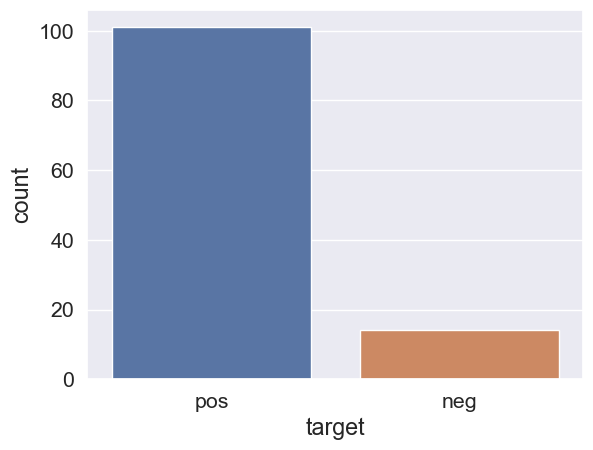

In [15]:
sns.countplot(x=clean_skilllane['target'])

In [16]:
clean_skilllane.columns

Index(['comments', 'stars', 'target'], dtype='object')

In [17]:
df_skilllane = clean_skilllane.drop('stars', axis=1)
df_skilllane

,comments,target
9,ได้ความรู้ดีมากค่ะ,pos
23,5,pos
34,น้ำเสียงคำพูดการสื่อสารชัดเจนเข้าใจง่ายดีมากครับ,pos
40,ต้องการให้มีการบรรยายมากกว่า 1 ท่าน เพื่อให้ไม...,neg
44,เยี่ยมครับ,pos
...,...,...
919,เหมาะสมกับทั้งคนที่ยังไม่มีพื้นฐาน และคนที่อยา...,pos
924,อันนี้รีวิว หลังจากดูจบแล้วครับ\nเกรินก่อน ผมเ...,pos
925,อ.บอย สอนได้ละเอียดมากครับ\nแต่ถ้าเอาไปเขียนเอ...,pos
944,สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...,pos


In [18]:
clean_skooldio = skooldio[['review','star']]
clean_skooldio

,review,star
0,ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...,5 Stars
1,"ดีครับ ดู practical, ไม่ลึกใน theory เกินไปและ...",5 Stars
2,ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...,5 Stars
3,คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...,5 Stars
4,คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...,4 Stars
...,...,...
839,สนุกและมีประโยชน์มากค่ะ อาจารย์สอนเข้าใจง่าย ไ...,5 Stars
840,คอร์สเรียนเข้าใจง่ายมาก คนไม่มีพื้นฐานก็สามารถ...,5 Stars
841,แนะนำเลย สำหรับคนที่สนใจการวิเคราะห์ข้อมูล,5 Stars
842,ใช้งานง่าน ทำได้จริงง,5 Stars


In [20]:
clean_skooldio = clean_skooldio.dropna()
clean_skooldio.drop_duplicates(inplace=True)
clean_skooldio

,review,star
0,ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...,5 Stars
1,"ดีครับ ดู practical, ไม่ลึกใน theory เกินไปและ...",5 Stars
2,ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...,5 Stars
3,คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...,5 Stars
4,คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...,4 Stars
...,...,...
839,สนุกและมีประโยชน์มากค่ะ อาจารย์สอนเข้าใจง่าย ไ...,5 Stars
840,คอร์สเรียนเข้าใจง่ายมาก คนไม่มีพื้นฐานก็สามารถ...,5 Stars
841,แนะนำเลย สำหรับคนที่สนใจการวิเคราะห์ข้อมูล,5 Stars
842,ใช้งานง่าน ทำได้จริงง,5 Stars


In [21]:
clean_skooldio['star'] = clean_skooldio['star'].str.replace('[Stars]','').astype(int)

/var/folders/by/0rz3gnw148l6ch25mwf10xjc0000gn/T/ipykernel_7936/2321439048.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_skooldio['star'] = clean_skooldio['star'].str.replace('[Stars]','').astype(int)


In [22]:
clean_skooldio.dtypes

review    object
star       int64
dtype: object

In [23]:
clean_skooldio['target'] = clean_skooldio['star'].apply(stars_to_types)

In [24]:
clean_skooldio = clean_skooldio.rename(columns={'review': 'comments'})

<AxesSubplot: xlabel='star', ylabel='count'>

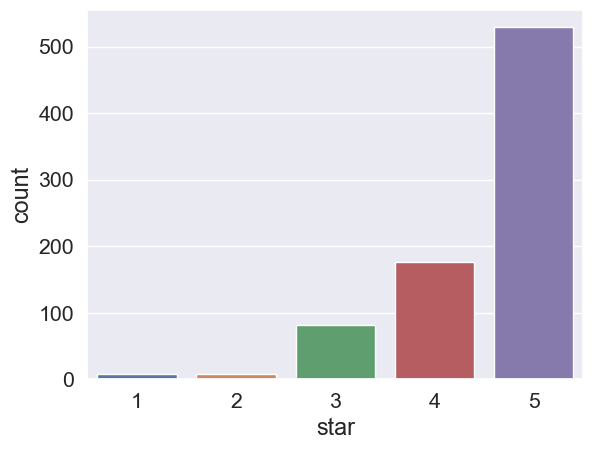

In [25]:
sns.countplot(x=clean_skooldio['star'])

<AxesSubplot: xlabel='target', ylabel='count'>

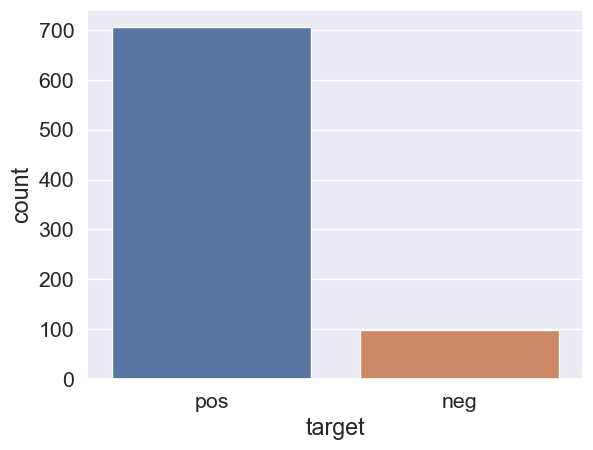

In [26]:
sns.countplot(x=clean_skooldio['target'])

In [27]:
df_skooldio = clean_skooldio.drop('star', axis=1)
df_skooldio

,comments,target
0,ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...,pos
1,"ดีครับ ดู practical, ไม่ลึกใน theory เกินไปและ...",pos
2,ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...,pos
3,คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...,pos
4,คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...,pos
...,...,...
839,สนุกและมีประโยชน์มากค่ะ อาจารย์สอนเข้าใจง่าย ไ...,pos
840,คอร์สเรียนเข้าใจง่ายมาก คนไม่มีพื้นฐานก็สามารถ...,pos
841,แนะนำเลย สำหรับคนที่สนใจการวิเคราะห์ข้อมูล,pos
842,ใช้งานง่าน ทำได้จริงง,pos


In [28]:
df = pd.concat([df_skooldio,df_skilllane])


In [29]:
df = df[df['comments'].str.contains('-') == False]
df.reset_index(drop=True, inplace=True)
df

,comments,target
0,ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...,pos
1,ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...,pos
2,คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...,pos
3,คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...,pos
4,สอนแบบมี Logic และ วิธีการที่ชัดเจน ชอบมากค่ะ,pos
...,...,...
884,เหมาะสมกับทั้งคนที่ยังไม่มีพื้นฐาน และคนที่อยา...,pos
885,อันนี้รีวิว หลังจากดูจบแล้วครับ\nเกรินก่อน ผมเ...,pos
886,อ.บอย สอนได้ละเอียดมากครับ\nแต่ถ้าเอาไปเขียนเอ...,pos
887,สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...,pos


pos    0.887514
neg    0.112486
Name: target, dtype: float64


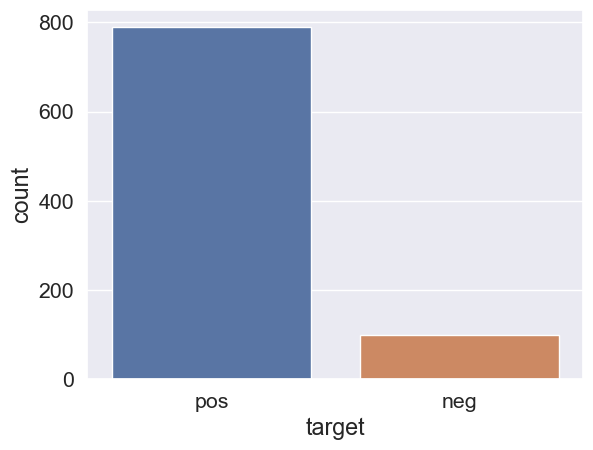

In [30]:
sns.countplot(x=df['target'])
print(df['target'].value_counts()/df.shape[0])

In [31]:
df.to_csv('sentiment_analysis.csv')

In [ ]:
#shopee = pd.read_csv('shopee_xiaomi.csv')

In [ ]:
#shopee

In [ ]:
#clean_shopee = shopee[['comment','star']]
#clean_shopee

In [ ]:
#clean_shopee['star'] = clean_shopee['star'].str.replace('[ดาว]','').astype(int)

In [ ]:
#sns.countplot(x=clean_shopee['star'])


In [ ]:
#clean_shopee['target'] = clean_shopee['star'].apply(stars_to_types)

In [ ]:
#sns.countplot(x=clean_shopee['target'])

In [ ]:
#clean_shopee['target'].value_counts()

In [ ]:
#peat = pd.read_csv('EIEI.csv')

In [ ]:
#peat['target'] = peat['star'].apply(stars_to_types)

In [ ]:
#df_new = pd.concat([peat,clean_shopee])
#df_new = df_new.drop('star', axis=1)

In [ ]:
#df_new['target'].value_counts()

In [ ]:
#sns.countplot(x=df_new['target'])

In [ ]:
#df_new.to_csv('shopee.csv')